In [1]:
#https://github.com/neuraloperator/physics_informed/tree/master

In [2]:
import numpy as np

import random
import deepxde as dde

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import matplotlib.animation as animation

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [3]:
#data_start = np.load('NS_fft_Re500_T4000.npy')

#print(data_start.shape)

(4000, 65, 64, 64)


In [4]:
#data_to_save = data_start[:100,:, :, :]
#file_path = 'use_data.npy'
#np.save(file_path, data_to_save)

In [5]:
data_load = np.load('use_data.npy')

In [7]:
data_load.shape

(100, 65, 64, 64)

In [8]:
data = data_load[0,0,:]
print(data.shape)

(64, 64)


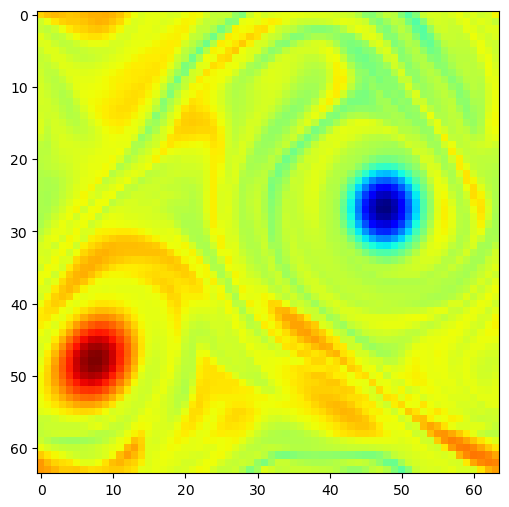

In [9]:
plt.figure(figsize=(8,6))
plt.imshow(data, cmap='jet', interpolation='nearest')

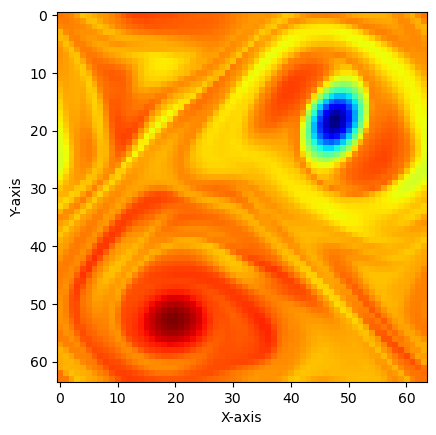

In [10]:
def animate(frame):
    plt.cla()
    plt.imshow(data_load[10,frame,:,:], cmap='jet', interpolation='nearest')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, animate, frames=65, interval = 50)

ani.save('NS_data_10.mp4',fps=20)

plt.show()

In [11]:
data_load.shape

(100, 65, 64, 64)

In [12]:
n_data, n_time, n_y, n_x = data_load.shape

In [17]:
print(n_data, n_time, n_y, n_x)

100 65 64 64


In [22]:
train_data_limit = 8
test_data_limit = 11
Extracted_data_time = 2

In [24]:
combinations = []

for i in range(Extracted_data_time):
    for j in range(n_y):
        for k in range(n_x):
            combinations.append((i,j,k))
            
combinations = np.array(combinations)
print(combinations.shape)
print(combinations)

(8192, 3)
[[ 0  0  0]
 [ 0  0  1]
 [ 0  0  2]
 ...
 [ 1 63 61]
 [ 1 63 62]
 [ 1 63 63]]


In [25]:
x = combinations

In [26]:
def interate_data(mx=n_x, my=n_y, mt=Extracted_data_time,n_start=0, n_end=train_data_limit, x=x, data=data_load[:test_data_limit,:Extracted_data_time,:,:] ):
    n = n_end - n_start
    us = np.zeros((mx*my*mt*n, mx*my))
    xs = np.zeros((mx*my*mt*n, 3))
    ss = np.zeros((mx*my*mt*n, 1))
    
    count = 0
    for i in range(n_start, n_end):
        for j in range(mt):
            for k in range(my):
                for l in range(mx):
                    initial_condition = data[i,0,:]
                    reshaped_line = initial_condition.reshape(mx*my)
                    
                    us[count, :] = reshaped_line
                    xs[count] = [j,k,l]
                    ss[count] = data[i,j,k,l]
                    
                    count = count+1
                    
    return us, xs, ss

In [27]:
us_train, xs_train, ss_train = interate_data(n_start=0, n_end=train_data_limit, data=data_load[:test_data_limit,:Extracted_data_time,:,:])

In [28]:
us_train.shape, xs_train.shape, ss_train.shape 

((65536, 4096), (65536, 3), (65536, 1))

In [29]:
us_test, xs_test, ss_test = interate_data(n_start=train_data_limit, n_end=test_data_limit, data=data_load[:test_data_limit,:Extracted_data_time,:,:])

In [30]:
us_test.shape, xs_test.shape, ss_test.shape

((24576, 4096), (24576, 3), (24576, 1))

In [31]:
us_train = us_train.astype(np.float32)
us_test = us_test.astype(np.float32)

xs_train = xs_train.astype(np.float32)
xs_test = xs_test.astype(np.float32)

ss_train = ss_train.astype(np.float32)
ss_test = ss_test.astype(np.float32)

In [32]:
X_train , y_train = (us_train, xs_train), ss_train
X_test , y_test = (us_test, xs_test), ss_test

In [33]:
data = dde.data.Triple(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [34]:
dim_a = n_y*n_x
print(dim_a)

4096


In [35]:
dim_x = 3

In [36]:
net = dde.maps.DeepONet([dim_a, 1000, 100],
                       [dim_x, 40,100],
                       'relu',
                       'Glorot normal')

In [38]:
model = dde.Model(data, net)

In [39]:
model.compile("adam", lr=0.001)

Compiling model...
'compile' took 0.020410 s



In [40]:
losshistory, train_state = model.train(iterations = 1000)

Training model...



C:\Users\mecha\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Step      Train loss    Test loss     Test metric
0         [3.84e+04]    [5.19e+04]    []  
1000      [1.39e+01]    [1.60e+02]    []  

Best model at step 1000:
  train loss: 1.39e+01
  test loss: 1.60e+02
  test metric: []

'train' took 4474.308392 s



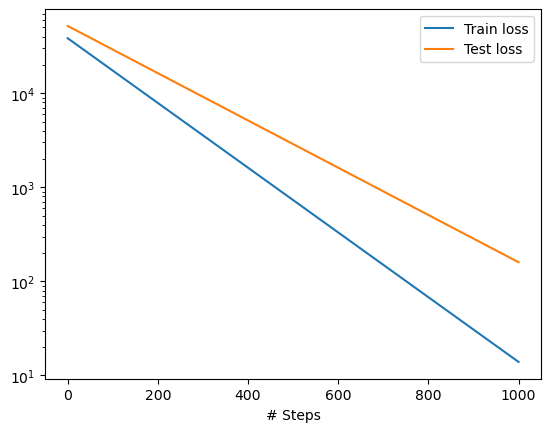

In [41]:
dde.utils.plot_loss_history(losshistory)

In [42]:
taken_data = 50
Extracted_data_time= 2

In [43]:
data_test  =  data_load[taken_data,:Extracted_data_time,:,:]

In [44]:
data_test.shape

(2, 64, 64)

In [45]:
combinations = []

for i in range(Extracted_data_time):
    for j in range(n_y):
        for k in range(n_x):
            combinations.append((i,j,k))
            
combinations = np.array(combinations)
print(combinations.shape)
print(combinations)

(8192, 3)
[[ 0  0  0]
 [ 0  0  1]
 [ 0  0  2]
 ...
 [ 1 63 61]
 [ 1 63 62]
 [ 1 63 63]]


In [46]:
x = combinations

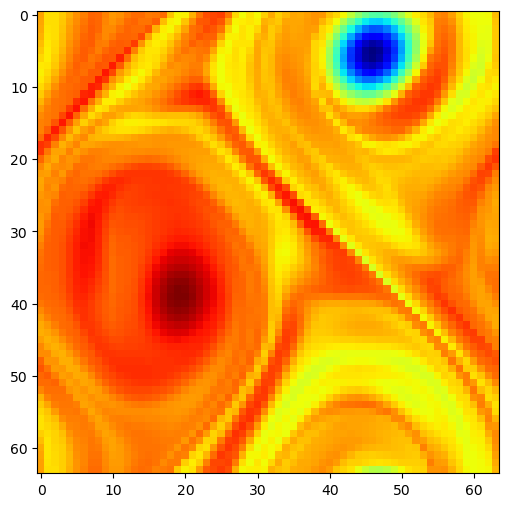

In [47]:
plt.figure(figsize = (8,6))
plt.imshow(data_test[0,:], cmap='jet', interpolation='nearest')

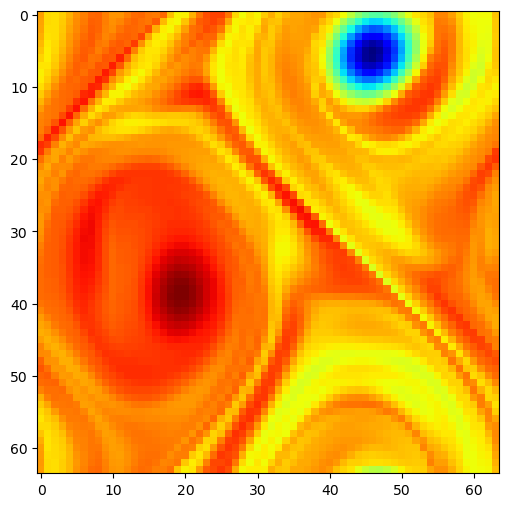

In [48]:
plt.figure(figsize = (8,6))
plt.imshow(data_test[1,:], cmap='jet', interpolation='nearest')

In [49]:
initial_condition_in = data_load[taken_data,0,:,:]
print(initial_condition_in.shape)

reshaped_line_in = initial_condition_in.reshape(n_y*n_x)
print(reshaped_line_in.shape)

(64, 64)
(4096,)


In [50]:
array_length = Extracted_data_time*n_y*n_x
reshaped_line_in_rep = np.vstack((reshaped_line_in,)*array_length)
print(reshaped_line_in_rep.shape)

(8192, 4096)


In [51]:
result = model.predict((reshaped_line_in_rep,x))

In [52]:
result.shape

(8192, 1)

In [53]:
result = result.reshape(Extracted_data_time,n_y,n_x)

In [54]:
result.shape

(2, 64, 64)

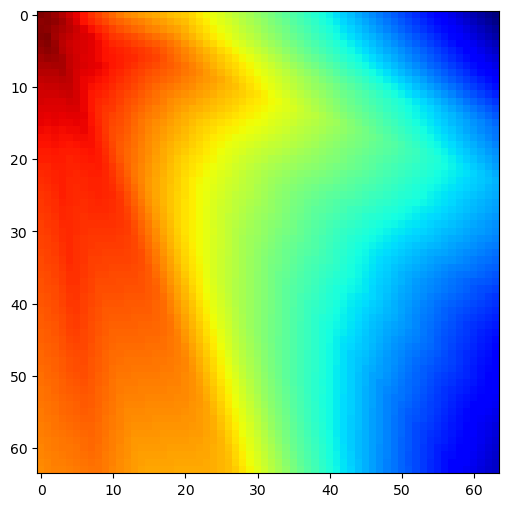

In [55]:
plt.figure(figsize = (8,6))
plt.imshow(result[0,:], cmap='jet', interpolation='nearest')

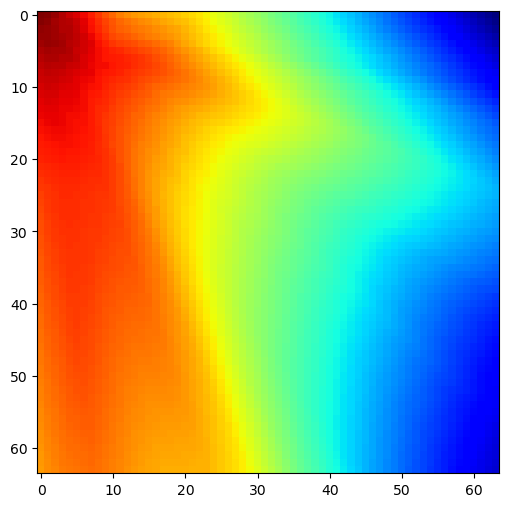

In [56]:
plt.figure(figsize = (8,6))
plt.imshow(result[1,:], cmap='jet', interpolation='nearest')